<a href="https://colab.research.google.com/github/mohamed-12-4/Center/blob/main/CH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
X[1].shape # Allready falatten

(784,)

'5'

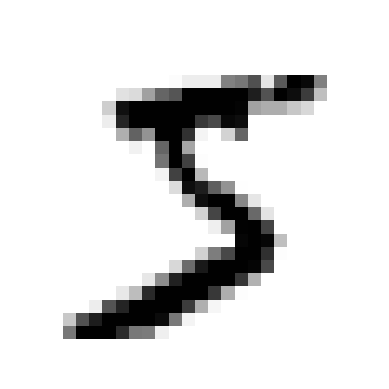

In [ ]:
import matplotlib.pyplot as plt
def plot_image(img):
  img = img.reshape(28, 28)

  plt.imshow(img, cmap="binary")
  plt.axis("off")

plot_image(X[0])
y[0]

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classifier

In [ ]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train_5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(logistic, X_train, y_train_5, cv=3, scoring="accuracy")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.97525, 0.9732 , 0.9732 ])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

params = [{
    "weights": ['uniform', 'distance'],
    "leaf_size": [30, 40],
    'n_neighbors': [4, 5, 6]
}]

gridsearch = GridSearchCV(knn_clf, params, cv=3)
gridsearch.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [30, 40], 'n_neighbors': [4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [ ]:
gridsearch.best_score_

0.9397994088551026

In [ ]:
from scipy.ndimage import shift


In [ ]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
img_s = shift(X[0].reshape(28, 28), [0,5])


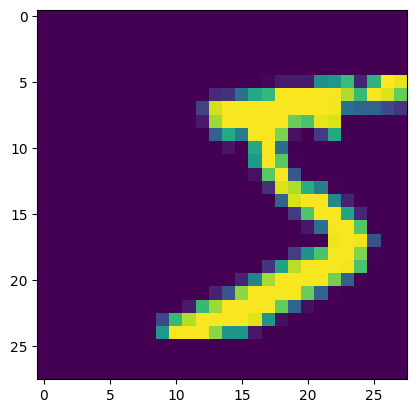

In [ ]:
plt.imshow(img_s)

In [ ]:
X[0].reshape(28, 28).reshape([-1]).shape

(784,)

In [ ]:
def shift_img(img, dx, dy):
  img = img.reshape((28, 28))
  img_s = shift(img, [dy, dx], cval=0, mode="constant")
  return img_s.reshape([-1])

In [ ]:
x_train_a = [x for x in X_train]
y_train_a = [y for y in y_train]

for dx, dy in ((0, 1), (0, -1), (1, 0), (-1, 0)):
  for img, label in zip(X_train, y_train):
    x_train_a.append(shift_img(img, dx, dy))
    y_train_a.append(label)

x_train_a = np.array(x_train_a)
y_train_a = np.array(y_train_a)

In [ ]:
len(x_train_a) == len(y_train_a)

True

In [ ]:
import numpy as np

# Shuffle the indices
idx = np.random.permutation(len(x_train_a))


# Shuffle the data
x_train_a = x_train_a[idx]
y_train_a = y_train_a[idx]

In [ ]:
knn_clf = KNeighborsClassifier(**gridsearch.best_params_)

In [ ]:
gridsearch.best_params_

{'leaf_size': 30, 'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
knn_clf.fit(x_train_a, y_train_a)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763

# Exercise 3

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]